In [225]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import style
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [226]:
# 2. Import the dataset (same directory - py)
df = pd.read_csv('winequality-red.csv')

In [227]:
# 3. Exploratory data analysis: Data Information
print(df.shape)
print(df.info())
print(df.describe())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000 

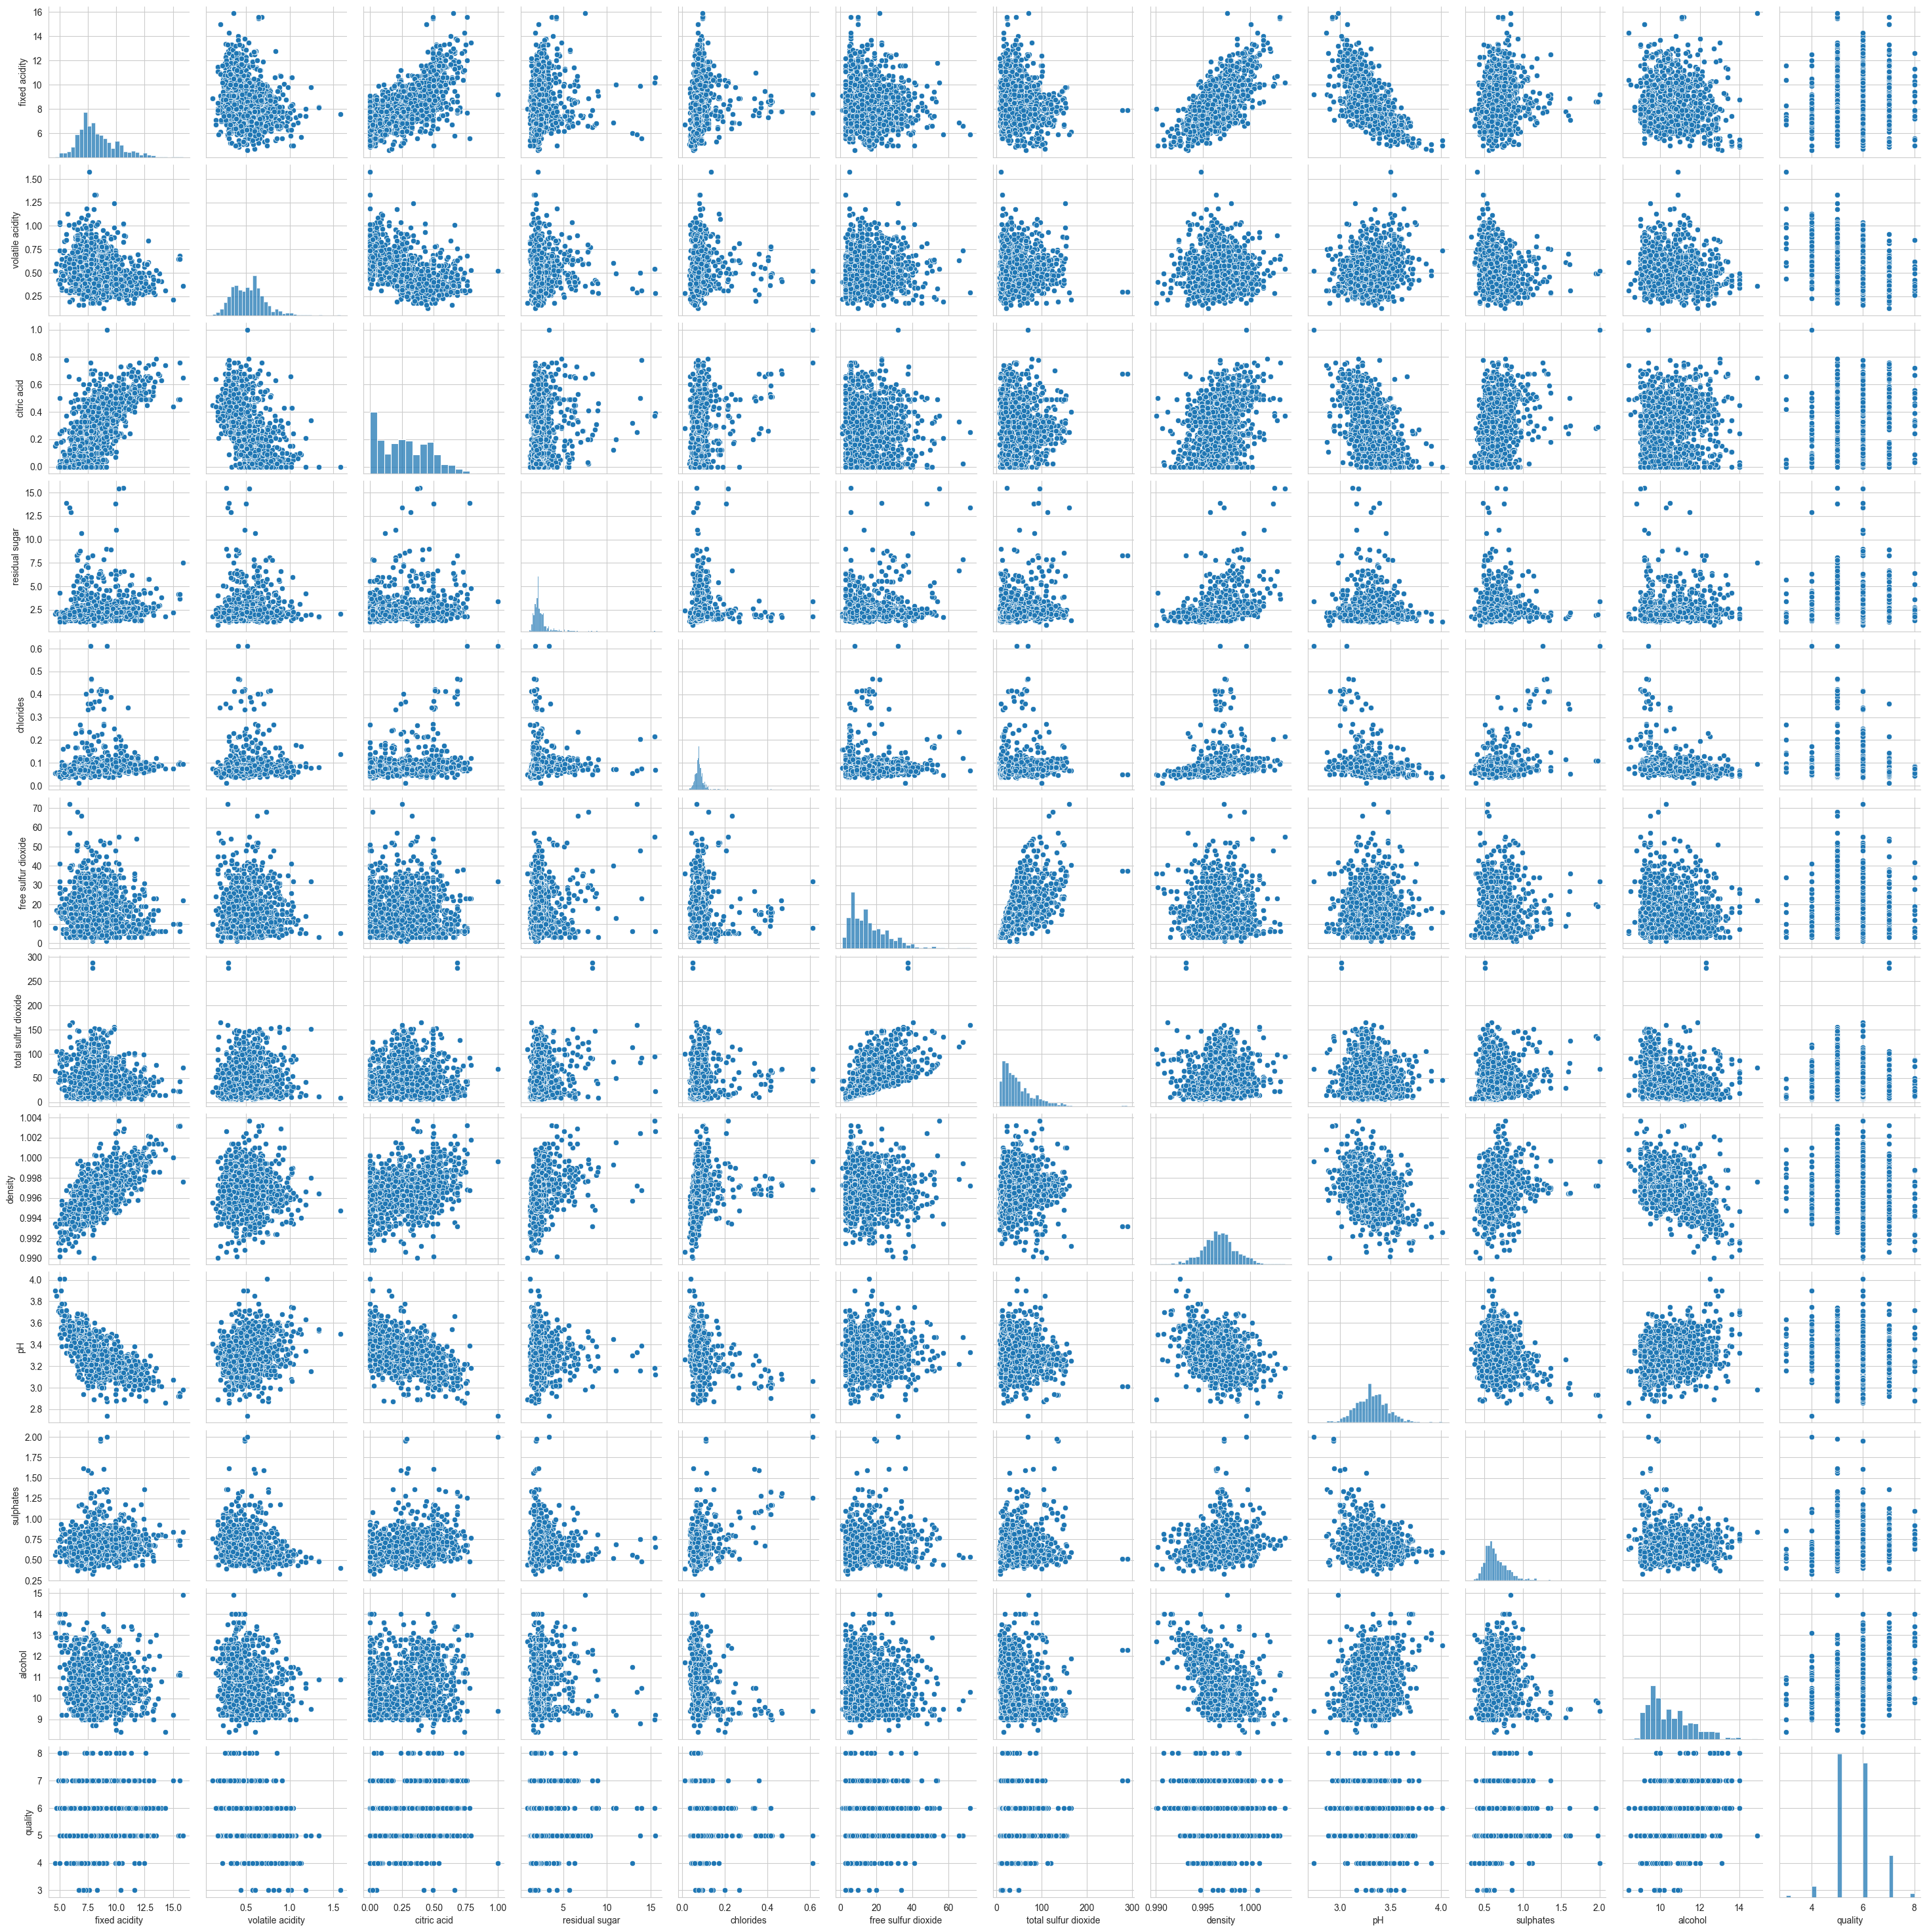

In [228]:
# 3. Exploratory data analysis: Data Visualization
sb.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

sb.pairplot(df)
plt.savefig('pairplor.png')

In [229]:
# 3. Exploratory data analysis: Check Missing Data
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


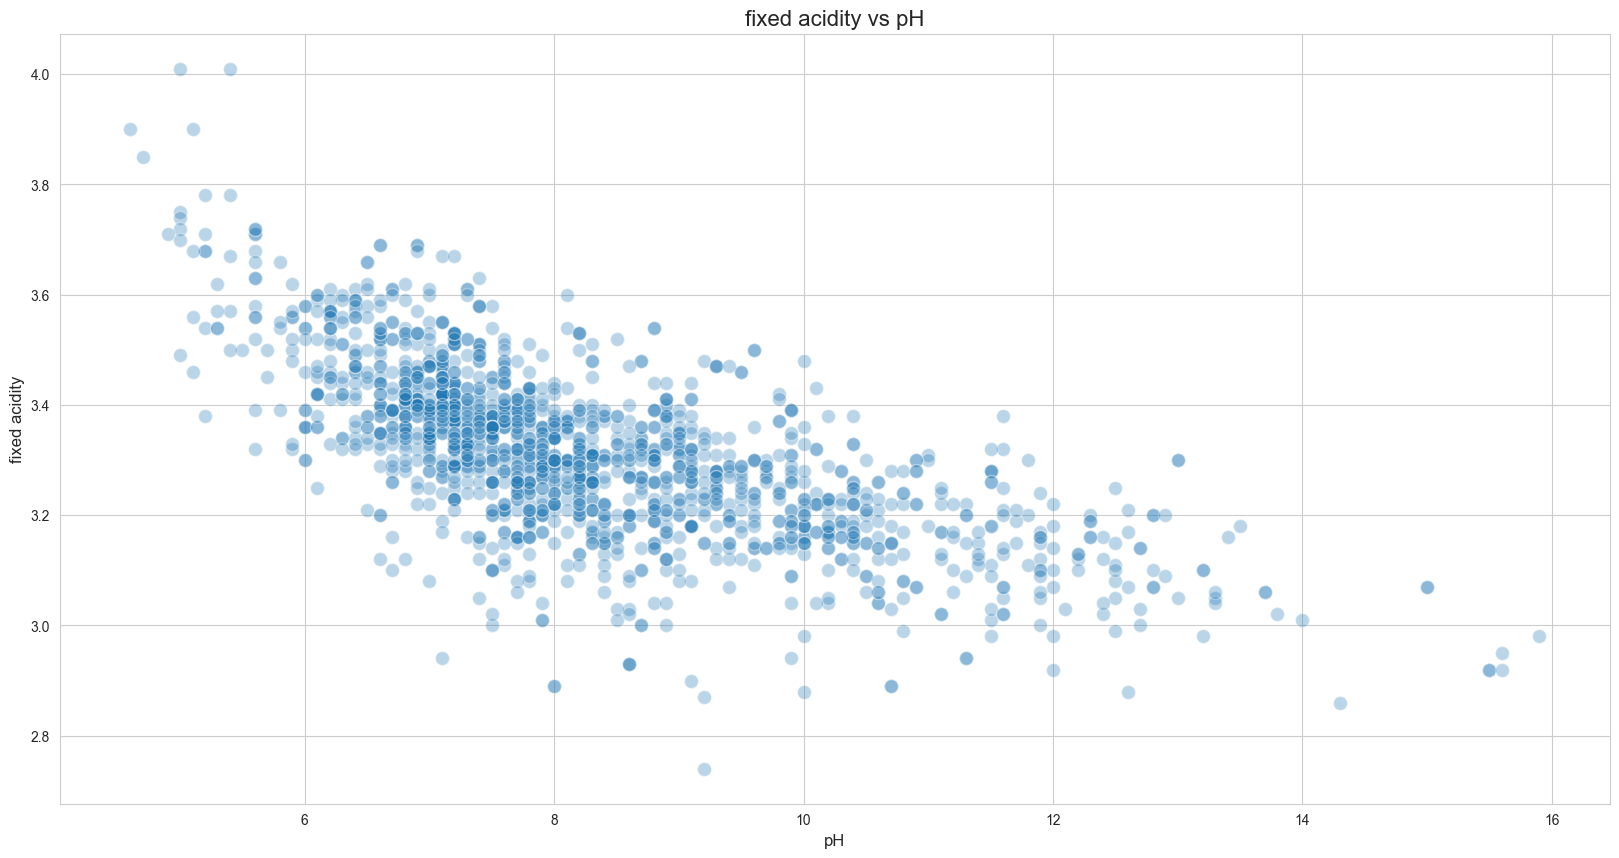

In [230]:
# 3. Exploratory data analysis: Find linear relationships
plt.scatter(x = 'fixed acidity', y = 'pH', 
		data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('fixed acidity vs pH', fontsize = 16)
plt.ylabel('fixed acidity', fontsize = 12)
plt.xlabel('pH', fontsize = 12)

plt.savefig('fixed acidity2.png')

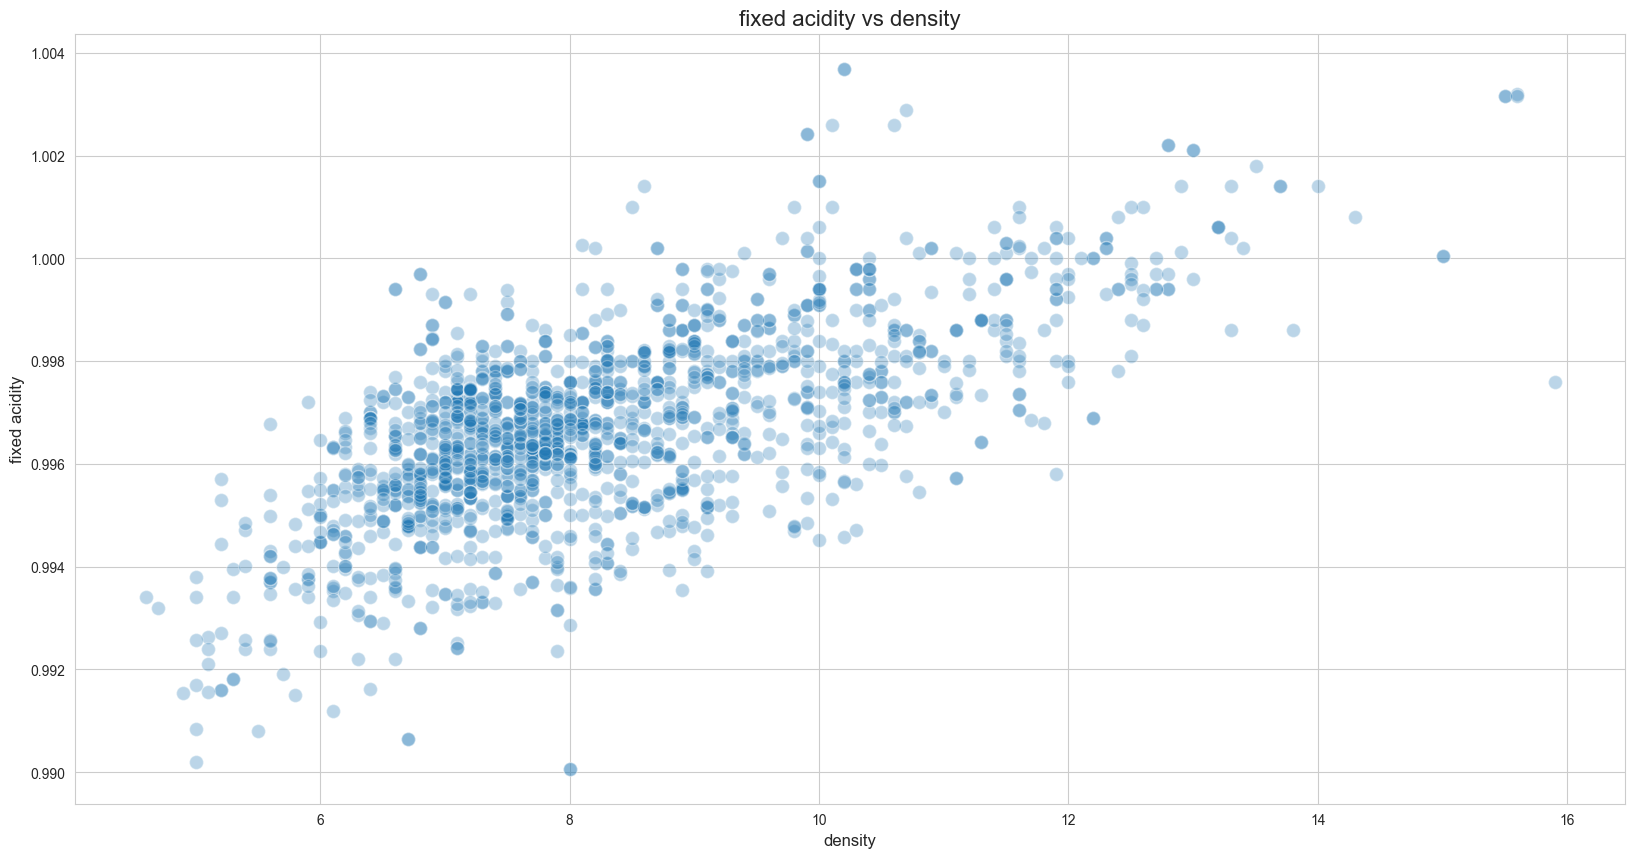

In [231]:
# 3. Exploratory data analysis: Find linear relationships
plt.scatter(x = 'fixed acidity', y = 'density', 
		data = df, s = 100, alpha = 0.3, edgecolor = 'white')

plt.title('fixed acidity vs density', fontsize = 16)
plt.ylabel('fixed acidity', fontsize = 12)
plt.xlabel('density', fontsize = 12)

plt.savefig('fixed acidity3.png')

In [232]:
# 4. SLR : id-value (pH), d-value (fixed acidity)
X_var = df[['pH']] 
y_var = df['fixed acidity'] 

X_train, X_test, y_train, y_test = train_test_split(
	X_var, y_var, test_size = 0.3, random_state = 0)

In [233]:
# 5. SLR : Training model
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [234]:
# 5. SLR : Check Accuracy Score - RMSE
MSE = mean_squared_error(y_test, yhat)
np.sqrt(MSE) 

1.2216744330592366

In [235]:
# 6. SLR : Check Accuracy Score - R squared
print(r2_score(y_test, yhat))

0.5059879527342228


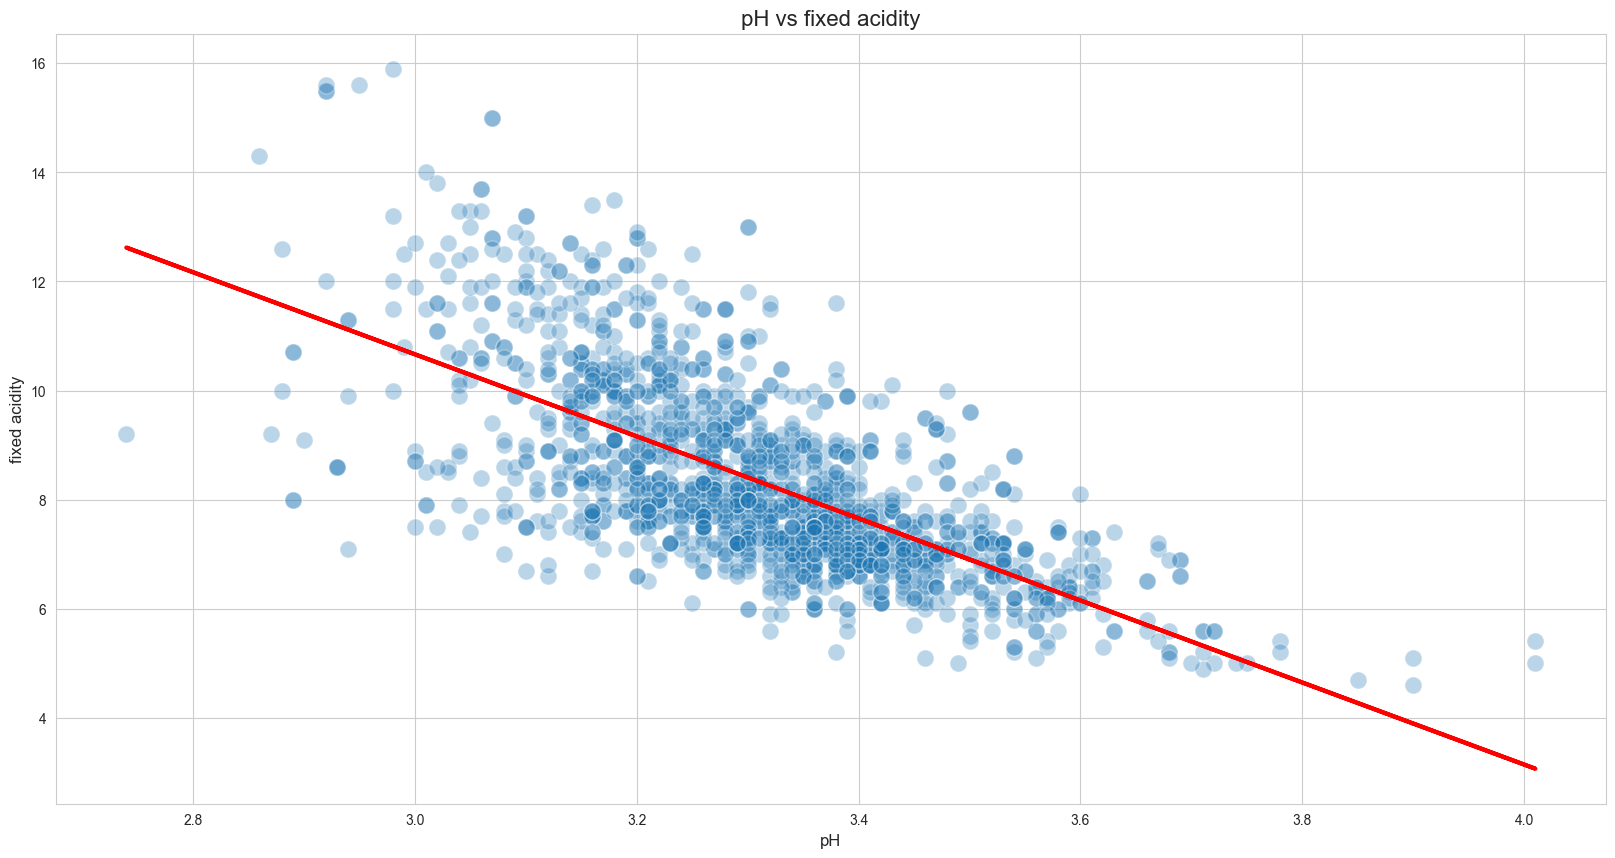

In [236]:
# 7. SLR : Check Accuracy Score Visualization
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sb.scatterplot(x = 'pH', y = 'fixed acidity', 
		data = df, s = 150, alpha = 0.3, edgecolor = 'white')
plt.plot(df['pH'], slr_slope*df['pH'] + slr_intercept, 
		color = 'r', linewidth = 3)
plt.title('pH vs fixed acidity', fontsize = 16)
plt.ylabel('fixed acidity', fontsize = 12)
plt.xlabel('pH', fontsize = 12)

plt.savefig('enginesize_co2_fit.png')

In [237]:
# 7. MLR : id-value (pH,density,citric acid), d-value (fixed acidity)
X1_var = df[['pH',
		'density',
		'citric acid']]
y_var = df['fixed acidity']

X_train, X_test, y_train, y_test = train_test_split(
		X1_var, 
		y_var, 
		test_size = 0.3, 
		random_state = 0)

In [238]:
# 7. MLR : Training model
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [239]:
# 7. MLR : Check Accuracy Score - RMSE
MSE = mean_squared_error(y_test, yhat)
np.sqrt(MSE) 

0.8340057828574466

In [240]:
# 7. MLR : Check Accuracy Score - R squared
print(r2_score(y_test, yhat))

0.7697685261644683


C:\Users\이종영\AppData\Local\Temp\ipykernel_20420\1769728049.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\이종영\AppData\Local\Temp\ipykernel_20420\1769728049.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

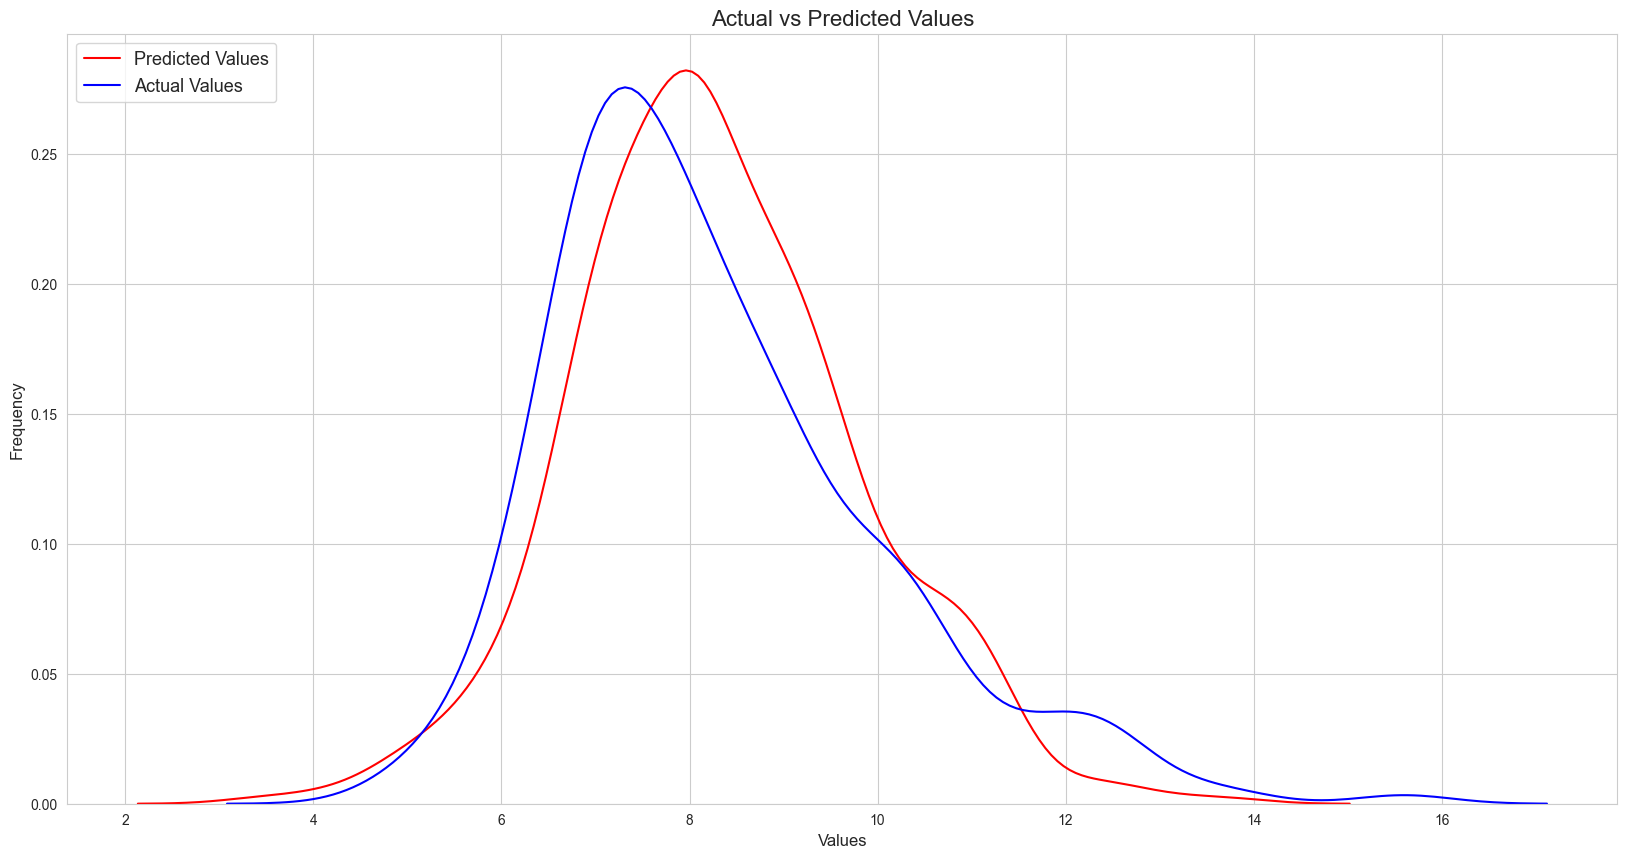

In [241]:
# 7. MLR : Check Accuracy Score Visualization
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [242]:
# 8. Ada : Training model
ada = AdaBoostRegressor(n_estimators = 10)
ada.fit(X_train, y_train)
yhat = ada.predict(X_test)

In [243]:
# 8. Ada : Check Accuracy Score - RMSE
MSE = mean_squared_error(y_test, yhat)
np.sqrt(MSE) 

0.8407859748268565

In [244]:
# 8. Ada : Check Accuracy Score - R squared
print(r2_score(y_test, yhat))

0.7660098979029796


C:\Users\이종영\AppData\Local\Temp\ipykernel_20420\4001177774.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\이종영\AppData\Local\Temp\ipykernel_20420\4001177774.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distpl

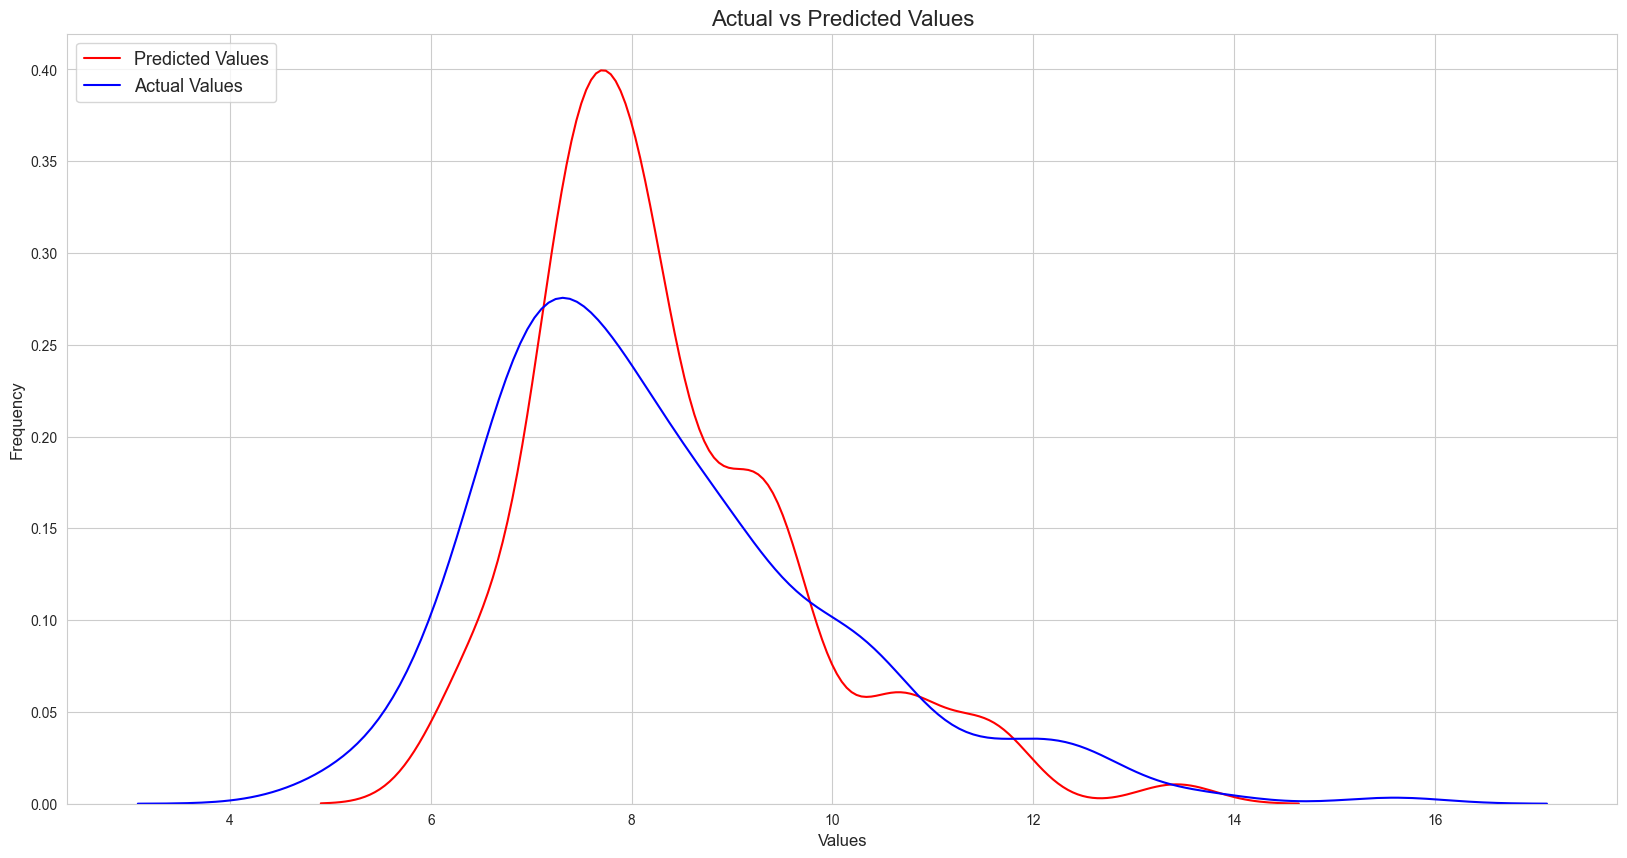

In [245]:
# 8. Ada : Check Accuracy Score Visualization
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')

In [246]:
# 9. RandomForest : Training model
rf = RandomForestRegressor(n_estimators = 10)
rf.fit(X_train, y_train)
yhat = rf.predict(X_test)

In [247]:
# 9. RandomForest : Check Accuracy Score - RMSE
MSE = mean_squared_error(y_test, yhat)
np.sqrt(MSE) 

0.795150944535003

In [248]:
# 9. RandomForest : Check Accuracy Score - R squared
print(r2_score(y_test, yhat))

0.7907209630926777


C:\Users\이종영\AppData\Local\Temp\ipykernel_20420\456052513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
C:\Users\이종영\AppData\Local\Temp\ipykernel_20420\456052513.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot

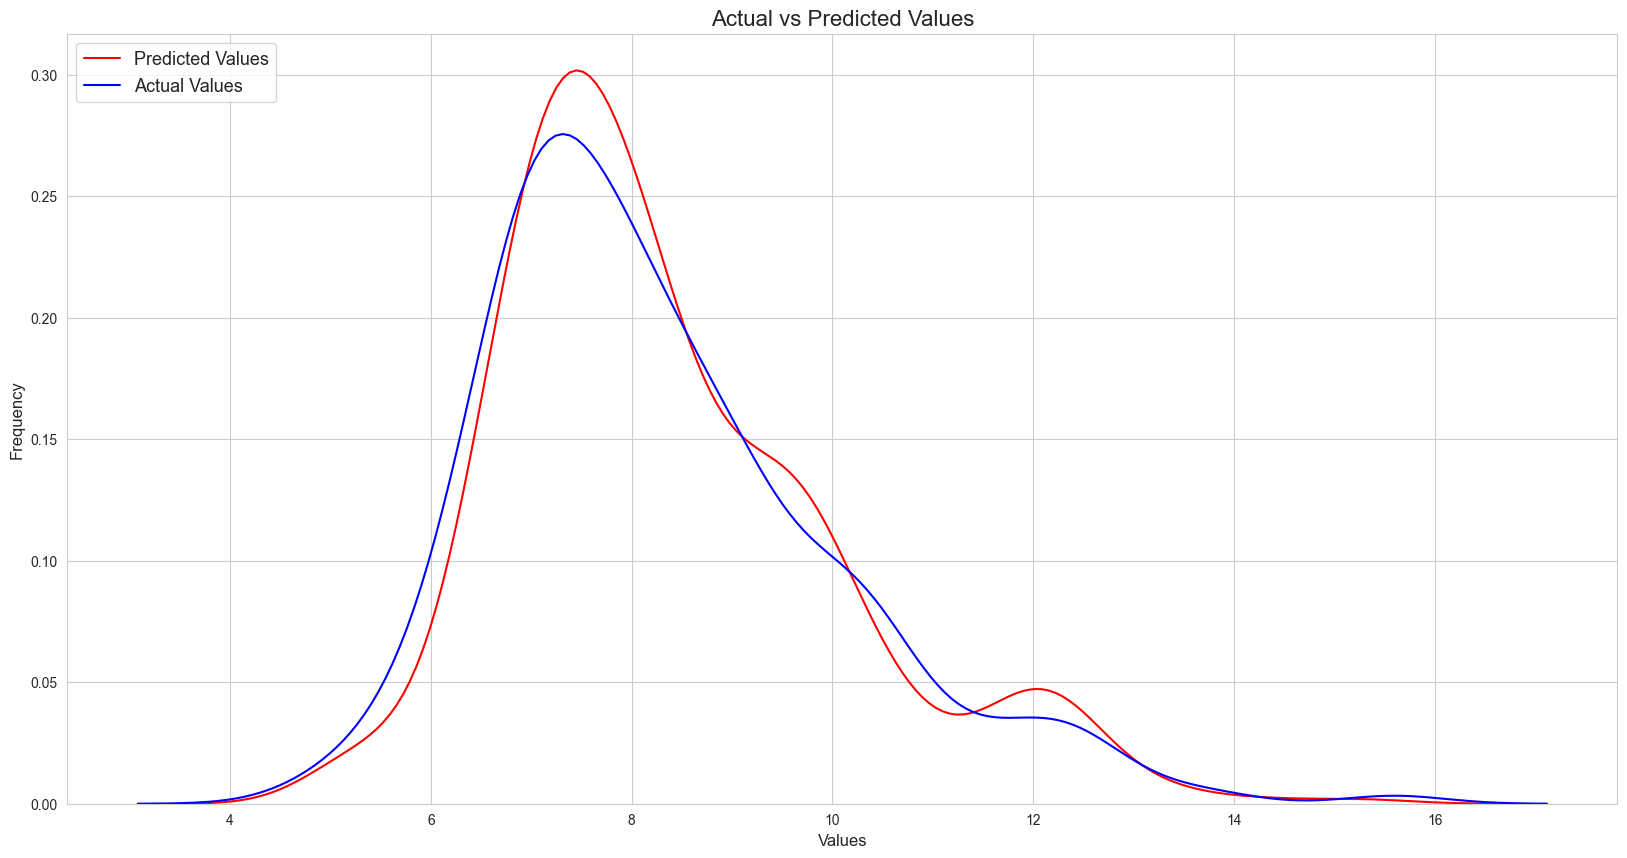

In [249]:
# 9. RandomForest : Check Accuracy Score Visualization
sb.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.savefig('ap.png')